In [5]:
import pandas as pd
advt = pd.read_csv(r"C:\Users\preet\Downloads\Advertising.csv" )

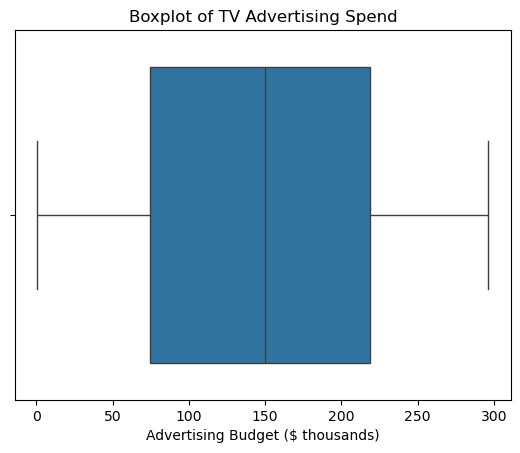

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'TV' column
sns.boxplot(x=advt['TV'])


plt.title("Boxplot of TV Advertising Spend")
plt.xlabel("Advertising Budget ($ thousands)")

plt.show()

In [7]:
# Outlier Treatment | P1 and P99 | highly subjective*
advt["Newspaper2"] = advt.Newspaper.clip(lower = advt['Newspaper'].quantile(0.01)  , upper = advt['Newspaper'].quantile(0.99))

#advt["Newspapper1"]=advt.Newspaper.clip(lower=advt.Newspaper.quantile(0.01),upper=advt.Newspaper.quantile(0.99))

In [9]:
# Step 1: Calculate Q1 and Q3
Q1 = advt["Newspaper"].quantile(0.25)
Q3 = advt["Newspaper"].quantile(0.75)

# Step 2: Compute IQR
IQR = Q3 - Q1

# Step 3: Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
advt["Newspaper"].describe

<bound method NDFrame.describe of 0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64>

In [ ]:
#winsorize?

In [11]:
# advt.Sales.fillna()
#__________________________________________________________________________________________
####  Assumption of LR : if Y is having missing then DELETE that row. Lolz
# advt.Sales.dropna()
#__________________________________________________________________________________________
# Handling Missings
# Fill with mean
# advt['Sales']=advt['Sales'].fillna(advt['Sales'].mean())

In [13]:
advt.isnull().sum()

Unnamed: 0     0
TV             0
Radio          0
Newspaper      0
Sales          0
Newspapper1    0
Newspaper2     0
dtype: int64

In [14]:
advt['Sales']=advt['Sales'].fillna(advt['Sales'].mean())

In [15]:
advt.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Newspapper1,Newspaper2
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616,-0.151129,-0.151129
TV,0.017715,1.000000,0.054809,0.056648,0.782224,0.059085,0.059085
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223,0.356255,0.356255
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299,0.996434,0.996434
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000,0.231335,0.231335
Newspapper1,-0.151129,0.059085,0.356255,0.996434,0.231335,1.000000,1.000000
Newspaper2,-0.151129,0.059085,0.356255,0.996434,0.231335,1.000000,1.000000


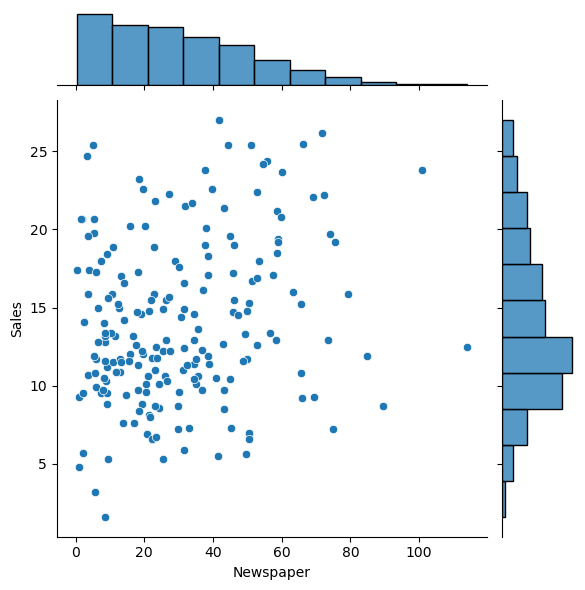

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
advt = advt.drop(columns=['Unnamed: 0'])
sns.jointplot(x='Newspaper', y='Sales', data=advt)
plt.show()
#report = advt.jointplot(advt.TV, advt.Sales)
#sns.jointplot(x='Newspaper', y='Sales', data=advt)

In [ ]:
!pip uninstall numpy
!pip install numpy==2.1

In [17]:
from ydata_profiling import profilereport

ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.3.

AttributeError: 'DataFrame' object has no attribute 'jointplot'

In [20]:
import statsmodels.formula.api as smf

In [21]:
lm = smf.ols('Sales ~ TV + Radio + Newspaper', advt).fit() 
# Ordinary Least Square method : For Regression MOdel

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        07:39:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Things to check and interpretation in the result SUMMARY
#_______________________________________________________________________________
# 1- R2                | IDeally it should be greater .60
# 2- ADjusted R2        | IDeally it should be close and similar to R2 | [R2 > = Adj R2]
# 3- there should not be much different begtween R2 and Adj R2 | Why ? What does that means ?
# 4- F STatistics - ANOVA
#   (generally used when to compare a second iterated model with the first previous one)
#(Because R2 is either gonna be same of little bit lesser iterations so ANOVA only tells me that Model has gained or not)
# 5- to check teh P value of each variable
#   to detect its sginificance in my model or not |
# A low p-value (typically < 0.05) suggests the predictor variable is statistically significant and likely has a real effect on the dependent variable, while a high p-value means the relationship might just be due to chance, and the variable may not be a good predictor
# Ho - X1 is not having impact on Sales |
         # because >> Beta1 = 0
# Ha = Beta1 # 0
#     in this case News Paper is accepted having P 0.86> 0.05
# P > 0.05 is insignificant